## Observations and Insights 

In [1]:
# 1) The mean and median tumor volume for mice treated with Ramicane and Capolumin were much lower (~40 mm3) as compared to the other 8 treatments (~53 mm3). Given sex, age, weight, number of mice, etc.
#    are relatively consistent across treatment groups, then this would suggest Ramicane and Capolumin are better at slowing tumor growth than the others.
# 2) Additionally, the variance and standard deviation for mice treated with Ramicane and Capolumin are much lower as well, which means the tumor volumes of these mice are closer in magnitude to one
#    another as compared to tumor volumes within other treatments. This would suggest Ramicane and Capolumin are giving a more specific response as the results for these two treatments are much less
#    spread out than the results for other treatments.
# 3) There existed only one outlier in final tumor volumes for mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin. Mouse ID c326 (Infubinol, female, 18 months, 25 g, 36.3 mm3) was barely a
#    lower outlier as the lower bound of the box plot was 36.8. None of the traits listed for this particular mouse gives reason to the small tumor size; however, the last time point taken for this mouse
#    was at 5 days. This suggests the mouse died early on into the study (as other mice did with this treatment), but there is a possibility this mouse was sick with another disease which competed for 
#    resources with the cancer, resulting in a smaller tumor size. This is just one example to explain the outlier, so physical diagnostics would need to be done to understand the cause of low tumor size.
	

In [2]:
#Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#Read in data from csv files.
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Merge data in csv files into a single data frame.
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Number of unique Mouse IDs.
merge_df["Mouse ID"].nunique()

249

In [4]:
#Check to see if there any Mouse IDs with duplicate time points.
dup_mice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [5]:
#Show Mouse IDs with duplicate time points.
pd.DataFrame(dup_mice)

,0
0,g989


In [6]:
#Remove Mouse IDs with duplicate time points and create a new data frame.
df = merge_df[merge_df["Mouse ID"].isin(dup_mice)==False]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#Number of unique Mouse IDs without duplicate time points.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
#Find mean, median, variance, standard deviation, standard error of measure
#for each drug regimen using groupby, then display in data frame.
mean = df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var = df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_dev = df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({
    "mean": mean,
    "median": median,
    "var": var,
    "std": std_dev,
    "sem": sem
})
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Find mean, median, variance, standard deviation, standard error of measure
#for each drug regimen using agg, then display in data frame.
summary2_df = df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

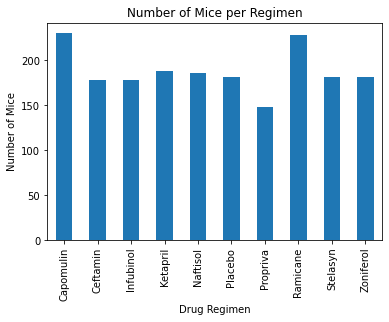

In [10]:
#Create a bar plot of number of mice per regimen using Pandas.
df.groupby("Drug Regimen").count()["Mouse ID"].plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen");

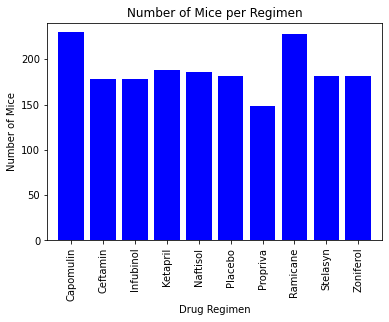

In [11]:
#Create a bar plot of number of mice per regimen using Pyplot.
drug_list = sorted(df["Drug Regimen"].unique().tolist())
mice_count_list = df.groupby("Drug Regimen")["Mouse ID"].count().tolist()
x_axis = np.arange(len(drug_list))
plt.bar(x_axis, mice_count_list, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_count_list)+10)
plt.title("Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice");

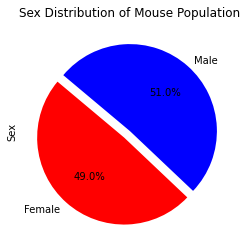

In [12]:
#Create a pie plot of number of mice per regimen using Pandas.
df.groupby("Sex").count()["Mouse ID"].plot.pie(colors=['red','blue'], startangle=140, explode = (0.1,0), autopct="%1.1f%%")
plt.title("Sex Distribution of Mouse Population")
plt.ylabel("Sex");

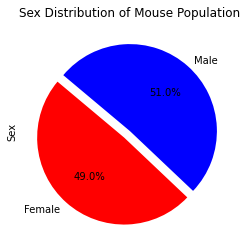

In [13]:
#Create a pie plot of number of mice per regimen using Pyplot.
sex_list = sorted(df["Sex"].unique().tolist())
sex_count = df.groupby("Sex")["Mouse ID"].count().tolist()
plt.pie(sex_count, labels=sex_list, colors = ["red","blue"], autopct="%1.1f%%", startangle=140, explode = (0.1,0))
plt.title("Sex Distribution of Mouse Population")
plt.ylabel("Sex");

## Quartiles, Outliers and Boxplots

In [14]:
#Create a data frame by grouping MouseID and Timepoint, then finding the max timepoint
#and merging a new column to the original data frame.
last_tp_df = pd.DataFrame(df.groupby("Mouse ID")["Timepoint"].max()).rename(columns={"Timepoint": "Last Timepoint"})

last_tp_merge_df = pd.merge(last_tp_df, df, on="Mouse ID")

In [15]:
#Create list of treatments we are concerned with and an empty list to append tumor volumes.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vols = []

#Write a for loop running through the new data frame to gather tumor volume numbers
#associated with the treatments in which we are interested. Also, report the IQR,
#both bounds, and if there are any outliers.
for drug in treatments:
    hold_df = last_tp_merge_df.loc[last_tp_merge_df["Drug Regimen"] == drug]
    vol_df = hold_df.loc[hold_df["Timepoint"] == hold_df["Last Timepoint"]]
    tumor_vols.append(vol_df["Tumor Volume (mm3)"])
    
    quartiles = vol_df["Tumor Volume (mm3)"].quantile([0.25,0.50,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_b = lower_q - (1.5*iqr)
    upper_b = upper_q + (1.5*iqr)
    outliers = (vol_df["Tumor Volume (mm3)"].loc[(vol_df["Tumor Volume (mm3)"] >= upper_b) | (vol_df["Tumor Volume (mm3)"] <= lower_b)]).count()
    
    print(f"{drug} has an IQR of{iqr: .2f} with bounds of{lower_b: .2f} &{upper_b: .2f} and {outliers} outliers.")


Capomulin has an IQR of 7.78 with bounds of 20.70 & 51.83 and 0 outliers.
Ramicane has an IQR of 9.10 with bounds of 17.91 & 54.31 and 0 outliers.
Infubinol has an IQR of 11.48 with bounds of 36.83 & 82.74 and 1 outliers.
Ceftamin has an IQR of 15.58 with bounds of 25.36 & 87.67 and 0 outliers.


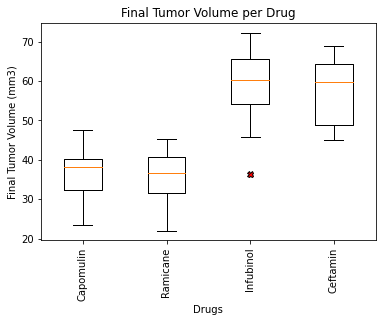

In [16]:
#Create a box plot of the data found above for final tumor volume per drug.
plt.boxplot(tumor_vols, flierprops=dict(markerfacecolor = "r", marker="X"))
plt.xticks([1,2,3,4], treatments, rotation=90)
plt.xlabel("Drugs")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Drug");

In [17]:
asdf = last_tp_merge_df.loc[last_tp_merge_df["Drug Regimen"] == "Infubinol"]
qwer = asdf.sort_values(by=["Last Timepoint"])
qwer

,Mouse ID,Last Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1543,v339,5,Infubinol,Male,20,26,0,45.000000,0
275,c326,5,Infubinol,Female,18,25,5,36.321346,0
1544,v339,5,Infubinol,Male,20,26,5,46.250112,0
1127,o813,5,Infubinol,Male,24,28,5,45.699331,0
1126,o813,5,Infubinol,Male,24,28,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
431,e476,45,Infubinol,Male,23,26,35,60.064340,1
432,e476,45,Infubinol,Male,23,26,40,61.525276,1
433,e476,45,Infubinol,Male,23,26,45,62.435404,1
427,e476,45,Infubinol,Male,23,26,15,54.046213,0


## Line and Scatter Plots

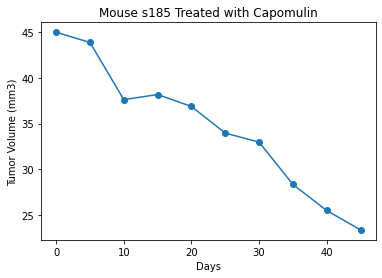

In [18]:
#Create a line plot of tumor size vs days for a mouse treated with Capomulin.
cap_mouse = df.loc[df["Mouse ID"] == "s185"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], marker = 'o')
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Treated with Capomulin");

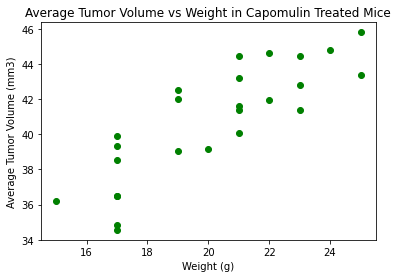

In [19]:
#Create a data frame which contains the weight and the average tumor size of the mice.
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
avg_vol_capomulin_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
avg_vol_capomulin_merge_df = pd.merge(capomulin_df, avg_vol_capomulin_df, on="Mouse ID")
final_df = avg_vol_capomulin_merge_df[["Weight (g)","Average Tumor Volume (mm3)"]].drop_duplicates()

#Create a scatter plot comparing average tumor size and weight.
x = final_df["Weight (g)"]
y = final_df["Average Tumor Volume (mm3)"]
plt.scatter(x, y, color="g")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight in Capomulin Treated Mice");

## Correlation and Regression

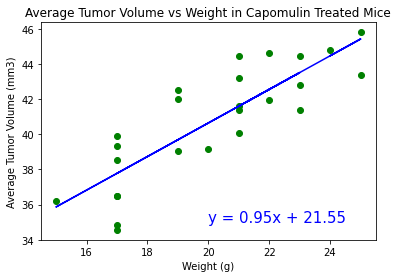

In [20]:
#Determine the correlation coefficient and linear regression model for average tumor volume vs weight.
corr = st.pearsonr(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create a scatter plot comparing average tumor size and weight, with linear regression line and equation.
plt.scatter(x,y, color="g")
plt.plot(x,regress_values,"b-")
plt.annotate(line_eq,(20,35),fontsize=15,color="b")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight in Capomulin Treated Mice");